# 这十套练习，教你如何用Pandas做数据分析


```Pandas```是入门```Python```做数据分析所必须要掌握的一个库。本文内容由**科赛网**翻译整理自[Github](https://github.com/guipsamora/pandas_exercises)，建议读者完成科赛网 [从零上手Python关键代码](https://www.kesci.com/apps/home/project/59e4331c4663f7655c499bc3) 和 [Pandas基础命令速查表](https://www.kesci.com/apps/home/project/59e389b54663f7655c48f518) 教程学习的之后，点击本篇Notebook右上角的 **Fork** 按钮对本教程代码进行调试学习。


**转载本文请联系  **[科赛网](https://www.kesci.com)** 取得授权**，[科赛网](https://www.kesci.com) 是聚合数据人才和行业问题的在线社区，率先打造国内首款K-Lab 在线数据分析协作平台，为数据工作者的学习与工作带来全新的体验。

# 练习题索引
点击习题编号即可跳转至习题内容。

|习题编号|内容|相应数据集|
|:---- |:-----|:------|
|[练习1 - 开始了解你的数据](#练习1-开始了解你的数据) |探索Chipotle快餐数据|chipotle.tsv|
|[练习2 - 数据过滤与排序](#练习2-数据过滤与排序) | 探索2012欧洲杯数据|Euro2012_stats.csv|
|[练习3 - 数据分组](#练习3-数据分组) |探索酒类消费数据|drinks.csv|
|[练习4 -Apply函数](#练习4-Apply函数)|探索1960 - 2014 美国犯罪数据|US_Crime_Rates_1960_2014.csv|
|[练习5 - 合并](#练习5-合并)|探索虚拟姓名数据|练习中手动内置的数据|
|[练习6 - 统计](#练习6-统计)|探索风速数据|wind.data|
|[练习7 - 可视化](#练习7-可视化)|探索泰坦尼克灾难数据|train.csv|
|[练习8 - 创建数据框](#练习8-创建数据框)|探索Pokemon数据|练习中手动内置的数据|
|[练习9 - 时间序列](#练习9-时间序列)|探索Apple公司股价数据|Apple_stock.csv|
|[练习10 - 删除数据](#练习10-删除数据) |探索Iris纸鸢花数据|iris.csv|


# 对应的数据集文件路径查看

In [2]:
ls ../input/pandas_exercise/exercise_data/

Apple_stock.csv  drinks.csv          second_cars_info.csv          wechart.csv
cars.csv         Euro2012_stats.csv  train.csv                     wind.data
chipotle.tsv     iris.csv            US_Crime_Rates_1960_2014.csv


# 练习1-开始了解你的数据
## 探索Chipotle快餐数据
![image description](https://cdn.kesci.com/images/lab_upload/1508342529498_40648.jpeg)

[返回练习题索引](#练习题索引)

### 步骤1 导入必要的库

In [5]:
# 运行以下代码
import pandas as pd

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### 步骤2 从如下地址导入数据集

In [6]:
# 运行以下代码
path1 = "../input/pandas_exercise/exercise_data/chipotle.tsv"    # chipotle.tsv

### 步骤3 将数据集存入一个名为chipo的数据框内

In [7]:
# 运行以下代码
chipo = pd.read_csv(path1, sep = '\t')

### 步骤4 查看前10行内容

In [8]:
# 运行以下代码
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### 步骤6 数据集中有多少个列(columns)

In [9]:
# 运行以下代码
chipo.shape[1]

5

### 步骤7 打印出全部的列名称

In [10]:
# 运行以下代码
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### 步骤8 数据集的索引是怎样的

In [11]:
# 运行以下代码
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### 步骤9 被下单数最多商品(item)是什么?

In [12]:
# 运行以下代码，做了修正
c = chipo[['item_name','quantity']].groupby(['item_name'],as_index=False).agg({'quantity':sum})
c.sort_values(['quantity'],ascending=False,inplace=True)
c.head()

,item_name,quantity
17,Chicken Bowl,761
18,Chicken Burrito,591
25,Chips and Guacamole,506
39,Steak Burrito,386
10,Canned Soft Drink,351


### 步骤10 在item_name这一列中，一共有多少种商品被下单？

In [13]:
# 运行以下代码
chipo['item_name'].nunique()

50

### 步骤11 在choice_description中，下单次数最多的商品是什么？

In [16]:
# 运行以下代码，存在一些小问题
chipo['choice_description'].value_counts().head()

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
Name: choice_description, dtype: int64

### 步骤12 一共有多少商品被下单？

In [22]:
# 运行以下代码
total_items_orders = chipo['quantity'].sum()
total_items_orders

4972

### 步骤13 将item_price转换为浮点数

In [23]:
# 运行以下代码
dollarizer = lambda x: float(x[1:-1])
chipo['item_price'] = chipo['item_price'].apply(dollarizer)

TypeError: 'float' object is not subscriptable

### 步骤14 在该数据集对应的时期内，收入(revenue)是多少

In [24]:
# 运行以下代码,已经做更正
chipo['sub_total'] = round(chipo['item_price'] * chipo['quantity'],2)
chipo['sub_total'].sum()

39237.02

### 步骤15 在该数据集对应的时期内，一共有多少订单？

In [26]:
# 运行以下代码
chipo['order_id'].nunique()

1834

### 步骤16 每一单(order)对应的平均总价是多少？

In [27]:
# 运行以下代码，已经做过更正
chipo[['order_id','sub_total']].groupby(by=['order_id']
).agg({'sub_total':'sum'})['sub_total'].mean()

21.39423118865867

### 步骤17 一共有多少种不同的商品被售出？

In [28]:
# 运行以下代码
chipo['item_name'].nunique()

50

[返回练习题索引](#练习题索引)

# 练习2-数据过滤与排序
## 探索2012欧洲杯数据
![image description](https://cdn.kesci.com/images/lab_upload/1508342554087_23763.jpeg)

[返回练习题索引](#练习题索引)

### 步骤1 - 导入必要的库

In [248]:
# 运行以下代码
import pandas as pd

### 步骤2 - 从以下地址导入数据集

In [29]:
# 运行以下代码
path2 = "../input/pandas_exercise/exercise_data/Euro2012_stats.csv"      # Euro2012_stats.csv

### 步骤3 - 将数据集命名为euro12

In [30]:
# 运行以下代码
euro12 = pd.read_csv(path2)
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


### 步骤4 只选取 ```Goals``` 这一列

In [251]:
# 运行以下代码
euro12.Goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

### 步骤5 有多少球队参与了2012欧洲杯？

In [252]:
# 运行以下代码
euro12.shape[0]

16

### 步骤6 该数据集中一共有多少列(columns)?

In [32]:
# 运行以下代码
euro12.info()
# euro12.shape[1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
Team                          16 non-null object
Goals                         16 non-null int64
Shots on target               16 non-null int64
Shots off target              16 non-null int64
Shooting Accuracy             16 non-null object
% Goals-to-shots              16 non-null object
Total shots (inc. Blocked)    16 non-null int64
Hit Woodwork                  16 non-null int64
Penalty goals                 16 non-null int64
Penalties not scored          16 non-null int64
Headed goals                  16 non-null int64
Passes                        16 non-null int64
Passes completed              16 non-null int64
Passing Accuracy              16 non-null object
Touches                       16 non-null int64
Crosses                       16 non-null int64
Dribbles                      16 non-null int64
Corners Taken                 16 non-null int64
Tackles                      

### 步骤7 将数据集中的列Team, Yellow Cards和Red Cards单独存为一个名叫discipline的数据框

In [34]:
# 运行以下代码
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### 步骤8 对数据框discipline按照先Red Cards再Yellow Cards进行排序 

In [35]:
# 运行以下代码
discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending = False)

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


### 步骤9 计算每个球队拿到的黄牌数的平均值

In [256]:
# 运行以下代码
round(discipline['Yellow Cards'].mean())

7.0

### 步骤10 找到进球数Goals超过6的球队数据

In [257]:
# 运行以下代码
euro12[euro12.Goals > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


### 步骤11 选取以字母G开头的球队数据

In [258]:
# 运行以下代码
euro12[euro12.Team.str.startswith('G')]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### 步骤12 选取前7列

In [259]:
# 运行以下代码
euro12.iloc[: , 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


### 步骤13 选取除了最后3列之外的全部列

In [260]:
# 运行以下代码
euro12.iloc[: , :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


### 步骤14 找到英格兰(England)、意大利(Italy)和俄罗斯(Russia)的射正率(Shooting Accuracy)

In [37]:
# 运行以下代码
euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


[返回练习题索引](#练习题索引)

# 练习3-数据分组
## 探索酒类消费数据
![image description](https://cdn.kesci.com/images/lab_upload/1508342577428_72275.jpeg)

[返回练习题索引](#练习题索引)

### 步骤1 导入必要的库

In [38]:
# 运行以下代码
import pandas as pd

### 步骤2 从以下地址导入数据

In [39]:
# 运行以下代码
path3 ='../input/pandas_exercise/exercise_data/drinks.csv'    #'drinks.csv'

### 步骤3 将数据框命名为drinks

In [40]:
# 运行以下代码
drinks = pd.read_csv(path3)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### 步骤4 哪个大陆(continent)平均消耗的啤酒(beer)更多？

In [41]:
# 运行以下代码
drinks.groupby('continent').beer_servings.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

### 步骤5 打印出每个大陆(continent)的红酒消耗(wine_servings)的描述性统计值

In [266]:
# 运行以下代码
drinks.groupby('continent').wine_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### 步骤6 打印出每个大陆每种酒类别的消耗平均值

In [267]:
# 运行以下代码
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### 步骤7 打印出每个大陆每种酒类别的消耗中位数

In [268]:
# 运行以下代码
drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### 步骤8 打印出每个大陆对spirit饮品消耗的平均值，最大值和最小值

In [269]:
# 运行以下代码
drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max'])

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302


# 练习4-Apply函数
## 探索1960 - 2014 美国犯罪数据
![image description](https://cdn.kesci.com/images/lab_upload/1508342597565_76025.jpeg)

[返回练习题索引](#练习题索引)

### 步骤1 导入必要的库

In [1]:
# 运行以下代码
import numpy as np
import pandas as pd

/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### 步骤2 从以下地址导入数据集

In [2]:
# 运行以下代码
path4 = '../input/pandas_exercise/exercise_data/US_Crime_Rates_1960_2014.csv'    # "US_Crime_Rates_1960_2014.csv"

### 步骤3 将数据框命名为crime

In [8]:
# 运行以下代码
crime = pd.read_csv(path4)
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### 步骤4 每一列(column)的数据类型是什么样的？

In [9]:
# 运行以下代码
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null int64
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: int64(12)
memory usage: 5.2 KB


*注意到了吗，Year的数据类型为 ```int64```，但是pandas有一个不同的数据类型去处理时间序列(time series)，我们现在来看看。*

### 步骤5 将Year的数据类型转换为 ```datetime64```

In [15]:
# 运行以下代码
crime.Year = pd.to_datetime(crime.Year, format='%Y')
crime.info()

AttributeError: 'DataFrame' object has no attribute 'Year'

### 步骤6 将列Year设置为数据框的索引

In [16]:
# 运行以下代码
crime = crime.set_index('Year', drop = True)
crime.head()

KeyError: 'Year'

### 步骤7 删除名为Total的列

In [13]:
# 运行以下代码
del crime['Total']
crime.head()

KeyError: 'Total'

In [17]:
crime.resample('10AS').sum()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,1915053175,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,2121193298,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,2371370069,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,2612825258,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,2947969117,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,1570146307,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080
2020-01-01,0,0,0,0,0,0,0,0,0,0


### 步骤8 按照Year对数据框进行分组并求和 
*注意Population这一列，若直接对其求和，是不正确的**

In [278]:
# 更多关于 .resample 的介绍
# (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)
# 更多关于 Offset Aliases的介绍 
# (http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)
# 运行以下代码
crimes = crime.resample('10AS').sum() # resample a time series per decades


# 用resample去得到“Population”列的最大值
population = crime['Population'].resample('10AS').max()

# 更新 "Population" 
crimes['Population'] = population

crimes

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,201385000.0,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,220099000.0,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,248239000.0,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,272690813.0,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,307006550.0,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,318857056.0,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080
2020-01-01,NaN,0,0,0,0,0,0,0,0,0


### 步骤9 何时是美国历史上生存最危险的年代？

In [18]:
# 运行以下代码
crime.idxmax(0)

Population           2014-01-01
Violent              1992-01-01
Property             1991-01-01
Murder               1991-01-01
Forcible_Rape        1992-01-01
Robbery              1991-01-01
Aggravated_assault   1993-01-01
Burglary             1980-01-01
Larceny_Theft        1991-01-01
Vehicle_Theft        1991-01-01
dtype: datetime64[ns]

[返回练习题索引](#练习题索引)

# 练习5-合并
## 探索虚拟姓名数据

[返回练习题索引](#练习题索引)

### 步骤1 导入必要的库

In [19]:
# 运行以下代码
import numpy as np
import pandas as pd

### 步骤2 按照如下的元数据内容创建数据框

In [21]:
# 运行以下代码
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

### 步骤3 将上述的数据框分别命名为```data1, data2, data3```

In [22]:
# 运行以下代码
data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

### 步骤4 将```data1```和```data2```两个数据框按照行的维度进行合并，命名为```all_data```

In [23]:
# 运行以下代码
all_data = pd.concat([data1, data2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


### 步骤5 将```data1```和```data2```两个数据框按照列的维度进行合并，命名为```all_data_col```

In [27]:
# 运行以下代码
all_data_col = pd.concat([data1, data2], axis = 1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


### 步骤6 打印```data3```

In [285]:
# 运行以下代码
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


### 步骤7 按照```subject_id```的值对```all_data```和```data3```作合并

In [286]:
# 运行以下代码
pd.merge(all_data, data3, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


### 步骤8 对```data1```和```data2```按照```subject_id```作连接

In [287]:
# 运行以下代码
pd.merge(data1, data2, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


### 步骤9 找到 ```data1``` 和 ```data2``` 合并之后的所有匹配结果

In [28]:
# 运行以下代码
pd.merge(data1, data2, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


[返回练习题索引](#练习题索引)

# 练习6-统计
## 探索风速数据
![image description](https://cdn.kesci.com/images/lab_upload/1508342625686_71026.jpg)

[返回练习题索引](#练习题索引)

### 步骤1 导入必要的库

In [29]:
# 运行以下代码
import pandas as pd
import datetime

### 步骤2 从以下地址导入数据

In [30]:
import pandas as pd

In [31]:
# 运行以下代码
path6 = "../input/pandas_exercise/exercise_data/wind.data"  # wind.data

### 步骤3 将数据作存储并且设置前三列为合适的索引

In [32]:
import datetime

In [33]:
# 运行以下代码
data = pd.read_table(path6, sep = "\s+", parse_dates = [[0,1,2]]) 
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### 步骤4 2061年？我们真的有这一年的数据？创建一个函数并用它去修复这个bug

In [34]:
# 运行以下代码
def fix_century(x):
    year = x.year - 100 if x.year > 1989 else x.year
    return datetime.date(year, x.month, x.day)

# apply the function fix_century on the column and replace the values to the right ones
data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)

# data.info()
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### 步骤5 将日期设为索引，注意数据类型，应该是```datetime64[ns]```

In [35]:
# 运行以下代码
# transform Yr_Mo_Dy it to date type datetime64
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

# set 'Yr_Mo_Dy' as the index
data = data.set_index('Yr_Mo_Dy')

data.head()
# data.info()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


### 步骤6 对应每一个location，一共有多少数据值缺失

In [36]:
# 运行以下代码
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### 步骤7 对应每一个location，一共有多少完整的数据值

In [37]:
# 运行以下代码
data.shape[0] - data.isnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

### 步骤8 对于全体数据，计算风速的平均值

In [40]:
# 运行以下代码
data.mean().mean()

10.227982360836924

### 步骤9 创建一个名为```loc_stats```的数据框去计算并存储每个location的风速最小值，最大值，平均值和标准差

In [299]:
# 运行以下代码
loc_stats = pd.DataFrame()

loc_stats['min'] = data.min() # min
loc_stats['max'] = data.max() # max 
loc_stats['mean'] = data.mean() # mean
loc_stats['std'] = data.std() # standard deviations

loc_stats

,min,max,mean,std
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


### 步骤10 创建一个名为```day_stats```的数据框去计算并存储所有location的风速最小值，最大值，平均值和标准差

In [41]:
# 运行以下代码
# create the dataframe
day_stats = pd.DataFrame()

# this time we determine axis equals to one so it gets each row.
day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


### 步骤11 对于每一个location，计算一月份的平均风速
*注意，1961年的1月和1962年的1月应该区别对待*

In [42]:
# 运行以下代码
# creates a new column 'date' and gets the values from the index
data['date'] = data.index

# creates a column for each value from date
data['month'] = data['date'].apply(lambda date: date.month)
data['year'] = data['date'].apply(lambda date: date.year)
data['day'] = data['date'].apply(lambda date: date.day)

# gets all value from the month 1 and assign to janyary_winds
january_winds = data.query('month == 1')

# gets the mean from january_winds, using .loc to not print the mean of month, year and day
january_winds.loc[:,'RPT':"MAL"].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

### 步骤12  对于数据记录按照年为频率取样

In [44]:
# 运行以下代码
data.query('month == 1 and day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1,1962,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1,1963,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1,1964,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1,1965,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966-01-01,1,1966,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967-01-01,1,1967,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968-01-01,1,1968,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969-01-01,1,1969,1


### 步骤13 对于数据记录按照月为频率取样

In [303]:
# 运行以下代码
data.query('day == 1')

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,1961-02-01,2,1961,1
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,1961-03-01,3,1961,1
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,1961-04-01,4,1961,1
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,1961-05-01,5,1961,1
1961-06-01,15.92,9.59,12.04,8.79,11.54,6.04,9.75,8.29,9.33,10.34,10.67,12.12,1961-06-01,6,1961,1
1961-07-01,7.21,6.83,7.71,4.42,8.46,4.79,6.71,6.00,5.79,7.96,6.96,8.71,1961-07-01,7,1961,1
1961-08-01,9.59,5.09,5.54,4.63,8.29,5.25,4.21,5.25,5.37,5.41,8.38,9.08,1961-08-01,8,1961,1
1961-09-01,5.58,1.13,4.96,3.04,4.25,2.25,4.63,2.71,3.67,6.00,4.79,5.41,1961-09-01,9,1961,1


[返回练习题索引](#练习题索引)

# 练习7-可视化
## 探索泰坦尼克灾难数据

[返回练习题索引](#练习题索引)

### 步骤1 导入必要的库

In [45]:
# 运行以下代码
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### 步骤2 从以下地址导入数据

In [46]:
# 运行以下代码
path7 = '../input/pandas_exercise/exercise_data/train.csv'  # train.csv

### 步骤3 将数据框命名为titanic

In [47]:
# 运行以下代码
titanic = pd.read_csv(path7)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 步骤4 将PassengerId设置为索引

In [48]:
# 运行以下代码
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 步骤5 绘制一个展示男女乘客比例的扇形图

In [50]:
# 运行以下代码
# sum the instances of males and females
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()

# put them into a list called proportions
proportions = [males, females]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['Males', 'Females'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()

<Figure size 432x288 with 1 Axes>

### 步骤6 绘制一个展示船票```Fare```, 与乘客年龄和性别的散点图

In [51]:
# 运行以下代码
# creates the plot using
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)

# set title
lm.set(title = 'Fare x Age')

# get the axes object and tweak it
axes = lm.axes
axes[0,0].set_ylim(-5,)
axes[0,0].set_xlim(-5,85)

(-5, 85)

<Figure size 427.25x360 with 1 Axes>

### 步骤7 有多少人生还？

In [52]:
# 运行以下代码
titanic.Survived.sum()

342

### 步骤8 绘制一个展示船票价格的直方图

In [53]:
# 运行以下代码
# sort the values from the top to the least value and slice the first 5 items
df = titanic.Fare.sort_values(ascending = False)
df

# create bins interval using numpy
binsVal = np.arange(0,600,10)
binsVal

# create the plot
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')

# show the plot
plt.show()

<Figure size 432x288 with 1 Axes>

[返回练习题索引](#练习题索引)

# 练习8-创建数据框
## 探索Pokemon数据
![image description](https://cdn.kesci.com/images/lab_upload/1508342670584_84032.jpeg)

[返回练习题索引](#练习题索引)

### 步骤1 导入必要的库

In [312]:
# 运行以下代码
import pandas as pd

### 步骤2 创建一个数据字典

In [56]:
# 运行以下代码
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### 步骤3 将数据字典存为一个名叫pokemon的数据框中

In [57]:
# 运行以下代码
pokemon = pd.DataFrame(raw_data)
pokemon.head()

,name,evolution,type,hp,pokedex
0,Bulbasaur,Ivysaur,grass,45,yes
1,Charmander,Charmeleon,fire,39,no
2,Squirtle,Wartortle,water,44,yes
3,Caterpie,Metapod,bug,45,no


### 步骤4 数据框的列排序是字母顺序，请重新修改为```name, type, hp, evolution, pokedex```这个顺序

In [315]:
# 运行以下代码
pokemon = pokemon[['name', 'type', 'hp', 'evolution','pokedex']]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


### 步骤5 添加一个列```place```

In [316]:
# 运行以下代码
pokemon['place'] = ['park','street','lake','forest']
pokemon

,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,park
1,Charmander,fire,39,Charmeleon,no,street
2,Squirtle,water,44,Wartortle,yes,lake
3,Caterpie,bug,45,Metapod,no,forest


### 步骤6 查看每个列的数据类型

In [317]:
# 运行以下代码
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
place        object
dtype: object

[返回练习题索引](#练习题索引)

# 练习9-时间序列
## 探索Apple公司股价数据
![image description](https://cdn.kesci.com/images/lab_upload/1508342688865_7439.jpeg)

[返回练习题索引](#练习题索引)

### 步骤1 导入必要的库

In [58]:
# 运行以下代码
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

### 步骤2 数据集地址

In [59]:
# 运行以下代码
path9 = '../input/pandas_exercise/exercise_data/Apple_stock.csv'   # Apple_stock.csv

### 步骤3 读取数据并存为一个名叫apple的数据框

In [60]:
# 运行以下代码
apple = pd.read_csv(path9)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52



### 步骤4 查看每一列的数据类型

In [61]:
# 运行以下代码
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### 步骤5 将```Date```这个列转换为```datetime```类型

In [62]:
# 运行以下代码
apple.Date = pd.to_datetime(apple.Date)
apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

### 步骤6 将```Date```设置为索引

In [63]:
# 运行以下代码
apple = apple.set_index('Date')
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### 步骤7 有重复的日期吗？

In [64]:
# 运行以下代码
apple.index.is_unique

True

### 步骤8 将index设置为升序

In [65]:
# 运行以下代码
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### 步骤9 找到每个月的最后一个交易日(business day)

In [326]:
# 运行以下代码
apple_month = apple.resample('BM')
apple_month.head()

/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  This is separate from the ipykernel package so we can avoid doing imports until


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


### 步骤10 数据集中最早的日期和最晚的日期相差多少天？

In [327]:
# 运行以下代码
(apple.index.max() - apple.index.min()).days

12261

### 步骤11 在数据中一共有多少个月？

In [328]:
# 运行以下代码
apple_months = apple.resample('BM').mean()
len(apple_months.index)

404

### 步骤12 按照时间顺序可视化```Adj Close```值

<Figure size 972x648 with 1 Axes>
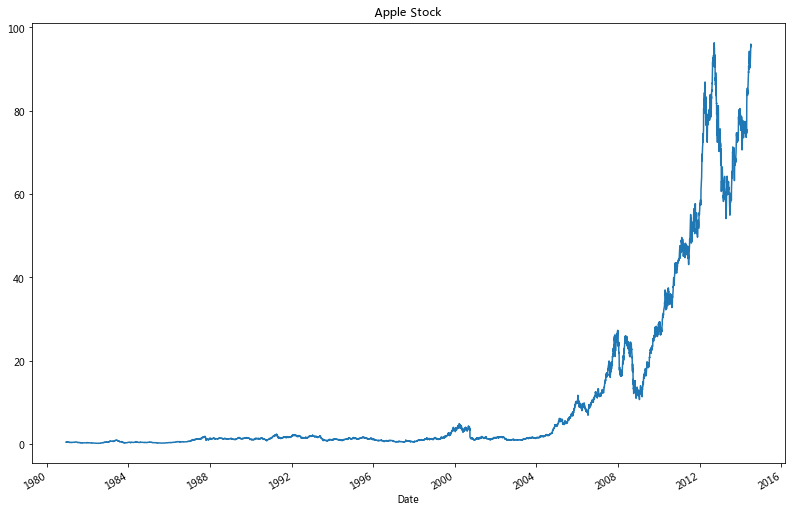

In [329]:
# 运行以下代码
# makes the plot and assign it to a variable
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

# changes the size of the graph
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

[返回练习题索引](#练习题索引)

# 练习10-删除数据
## 探索Iris纸鸢花数据

### 步骤1 导入必要的库

In [330]:
# 运行以下代码
import pandas as pd

### 步骤2 数据集地址

In [331]:
# 运行以下代码
path10 ='../input/pandas_exercise/exercise_data/iris.csv'   # iris.csv

### 步骤3 将数据集存成变量```iris```

In [332]:
# 运行以下代码
iris = pd.read_csv(path10)
iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### 步骤4 创建数据框的列名称

In [333]:
iris = pd.read_csv(path10,names = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 步骤5 数据框中有缺失值吗？

In [334]:
# 运行以下代码
pd.isnull(iris).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

### 步骤6 将列```petal_length```的第10到19行设置为缺失值

In [335]:
# 运行以下代码
iris.iloc[10:20,2:3] = np.nan
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### 步骤7 将缺失值全部替换为1.0

In [336]:
# 运行以下代码
iris.petal_length.fillna(1, inplace = True)
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### 步骤8 删除列```class```

In [337]:
# 运行以下代码
del iris['class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 步骤9 将数据框前三行设置为缺失值

In [338]:
# 运行以下代码
iris.iloc[0:3 ,:] = np.nan
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 步骤10 删除有缺失值的行

In [339]:
# 运行以下代码
iris = iris.dropna(how='any')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2


### 步骤11 重新设置索引

In [340]:
# 运行以下代码
iris = iris.reset_index(drop = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.6,3.1,1.5,0.2
1,5.0,3.6,1.4,0.2
2,5.4,3.9,1.7,0.4
3,4.6,3.4,1.4,0.3
4,5.0,3.4,1.5,0.2


[返回练习题索引](#练习题索引)

# 结语
恭喜你已经完成了这10套题目的练习。欢迎查看科赛网用户贡献的[科赛项目](https://www.kesci.com/apps/home/project)以及[科赛数据集](https://www.kesci.com/apps/home/dataset)获取更多优秀学习内容。